In [50]:
--A lekérdezés megmondja, hogy hány olyan termék van amelyek az egyes intervallumokba tartoznak (pl.: A készlet kifogyóban van)
SELECT CASE 
            When KESZLET < 250 THEN 'A készlet kifogyóban van'
            When KESZLET < 500 THEN 'Alacsony mennyiségben elérhető'
            When KESZLET < 1000 THEN 'Közepes mennyiségben elérhető'
            Else 'Nagy mennyiségben elérhető'
        End As 'Készlet megnevezés', COUNT(*) AS 'Termék db'
FROM Termek
GROUP BY CASE 
            When KESZLET < 250 THEN 'A készlet kifogyóban van'
            When KESZLET < 500 THEN 'Alacsony mennyiségben elérhető'
            When KESZLET < 1000 THEN 'Közepes mennyiségben elérhető'
            Else 'Nagy mennyiségben elérhető'
        End
ORDER BY COUNT(*) DESC


(4 rows affected)

Total execution time: 00:00:00.014

Készlet megnevezés,Termék db
A készlet kifogyóban van,206
Nagy mennyiségben elérhető,167
Alacsony mennyiségben elérhető,94
Közepes mennyiségben elérhető,84


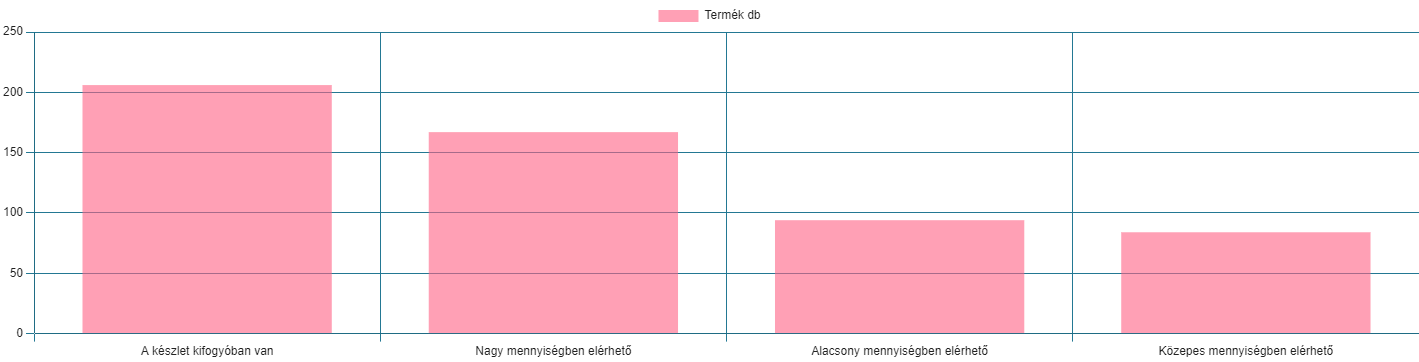

In [51]:
--A lekérdezés megmondja, hogy hány darab termék rendelkezik leírással és hány nem
SELECT CASE 
            When LEIRAS IS NULL Then 'Nincs leírás'
            When LEN(LEIRAS) = 0 Then 'Üres'
            Else 'Van leírás'
        End As 'Típus', COUNT(*) AS 'Darabszám'
FROM Termek
Group By CASE 
            When LEIRAS IS NULL Then 'Nincs leírás'
            When LEN(LEIRAS) = 0 Then 'Üres'
            Else 'Van leírás'
        End

(2 rows affected)

Total execution time: 00:00:00.010

Típus,Darabszám
Nincs leírás,527
Van leírás,24


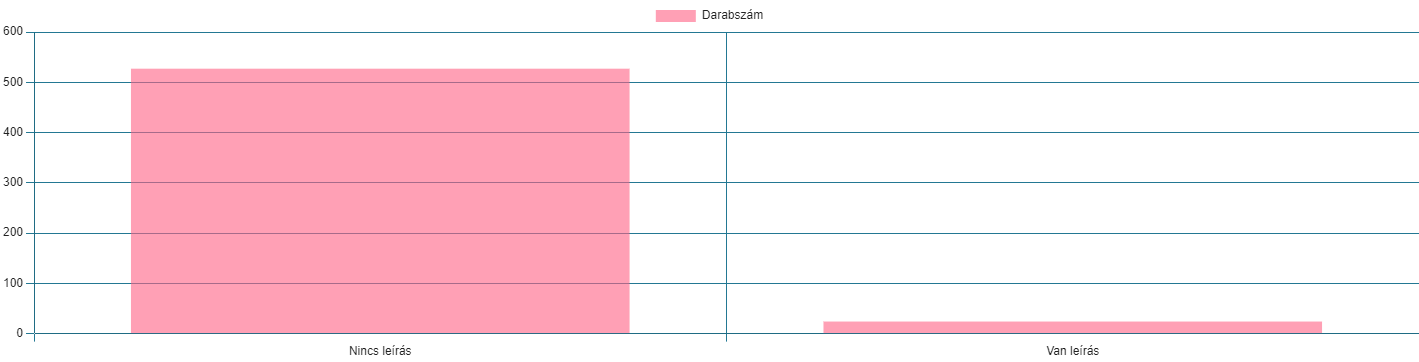

In [52]:
--A lekérdezés kiírja a legolcsóbb és legdrágább termék nevét és az árát
SELECT CASE 
            When LISTAAR = (SELECT MIN(LISTAAR) From Termek) Then 'Legolcsóbb termék'
            When LISTAAR = (SELECT MAX(LISTAAR) FROM Termek) Then 'Legdrágább termék'
        End AS 'Kategória', MEGNEVEZES AS 'Termék név', LISTAAR 'Listaár'
From Termek
WHERE LISTAAR = (SELECT MIN(LISTAAR) From Termek) Or LISTAAR = (SELECT MAX(LISTAAR) FROM Termek)


(2 rows affected)

Total execution time: 00:00:00.008

Kategória,Termék név,Listaár
Legolcsóbb termék,Filctoll CD író,0
Legdrágább termék,kosztüm (hosszú),46000


In [53]:
--A lekérdezés megmondja, hogy az egyes mennyiségi egységekkből hány darab van
SELECT MEGYS AS 'Mennyiségi egység', COUNT(*) AS 'Darabszám'
FROM Termek
GROUP BY MEGYS
ORDER By COUNT(*) DESC


(6 rows affected)

Total execution time: 00:00:00.009

Mennyiségi egység,Darabszám
db,483
csomag,44
ív,21
tekercs,1
üveg,1
doboz,1


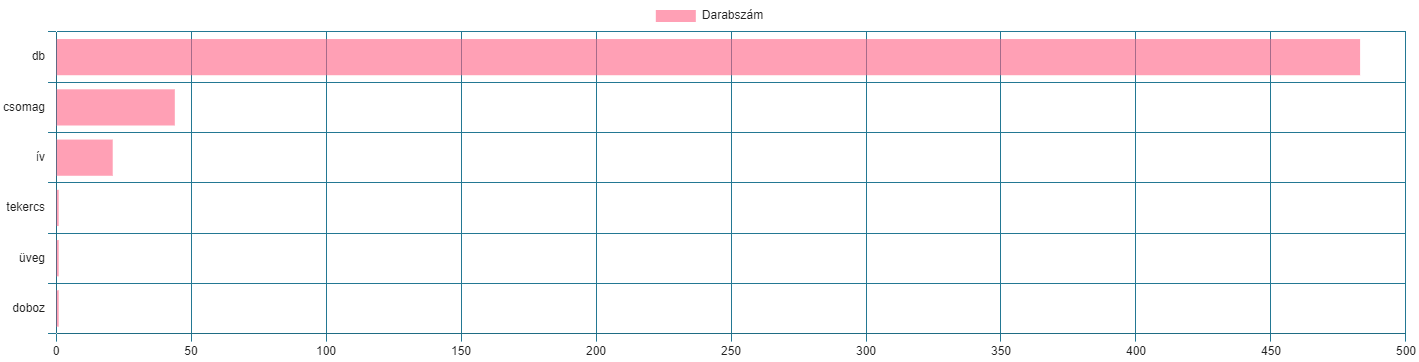

In [54]:
--A lekérdezés megmondja, hogy melyik felhasználó vitte fel a legtöbb terméket és hány darabot
SELECT TOP 1 FELVITTE AS 'Felvitte', COUNT(*) AS 'Felvitt db'
FROM Termek
GROUP BY FELVITTE
ORDER BY COUNT(*) DESC

(1 row affected)

Total execution time: 00:00:00.009

Felvitte,Felvitt db
Béla,189
